# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create lists for lat, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | thinadhoo
Processing Record 2 of Set 1 | poum
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | sabzevar
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping . . .
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | tyumentsevo
Processing Record 8 of Set 1 | tautira
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sydney
Processing Record 11 of Set 1 | morgaushi
Processing Record 12 of Set 1 | callaway
Processing Record 13 of Set 1 | ginir
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | mollendo
Processing Record 16 of Set 1 | wuhu
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | uwayl
City not found. Skipping . . .
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 |

Processing Record 14 of Set 4 | nobres
Processing Record 15 of Set 4 | stromness
Processing Record 16 of Set 4 | vila
Processing Record 17 of Set 4 | saint george
Processing Record 18 of Set 4 | yulara
Processing Record 19 of Set 4 | saskylakh
Processing Record 20 of Set 4 | hambantota
Processing Record 21 of Set 4 | roros
Processing Record 22 of Set 4 | nianzishan
Processing Record 23 of Set 4 | hilo
Processing Record 24 of Set 4 | bandar-e lengeh
Processing Record 25 of Set 4 | nichinan
Processing Record 26 of Set 4 | zemio
Processing Record 27 of Set 4 | kavieng
Processing Record 28 of Set 4 | nikolskoye
Processing Record 29 of Set 4 | longonjo
Processing Record 30 of Set 4 | avarua
Processing Record 31 of Set 4 | asau
Processing Record 32 of Set 4 | ilulissat
Processing Record 33 of Set 4 | abalak
Processing Record 34 of Set 4 | lorengau
Processing Record 35 of Set 4 | arkhangelsk
Processing Record 36 of Set 4 | hasaki
Processing Record 37 of Set 4 | dire
Processing Record 38 of Se

Processing Record 37 of Set 7 | gazojak
Processing Record 38 of Set 7 | nome
Processing Record 39 of Set 7 | vila franca do campo
Processing Record 40 of Set 7 | beira
Processing Record 41 of Set 7 | bilibino
Processing Record 42 of Set 7 | saint-georges
Processing Record 43 of Set 7 | xuddur
Processing Record 44 of Set 7 | santa maria del oro
Processing Record 45 of Set 7 | blagoyevo
Processing Record 46 of Set 7 | uglegorsk
Processing Record 47 of Set 7 | wenatchee
Processing Record 48 of Set 7 | lenger
Processing Record 49 of Set 7 | yerbogachen
Processing Record 50 of Set 7 | ilovka
Processing Record 1 of Set 8 | kumluca
Processing Record 2 of Set 8 | baniyas
Processing Record 3 of Set 8 | rezekne
Processing Record 4 of Set 8 | bendigo
Processing Record 5 of Set 8 | ossora
Processing Record 6 of Set 8 | buchanan
Processing Record 7 of Set 8 | khilok
Processing Record 8 of Set 8 | gravdal
Processing Record 9 of Set 8 | bengkulu
Processing Record 10 of Set 8 | urupes
Processing Recor

Processing Record 10 of Set 11 | kalemie
Processing Record 11 of Set 11 | strezhevoy
Processing Record 12 of Set 11 | ponnani
Processing Record 13 of Set 11 | rosetta
Processing Record 14 of Set 11 | villa maria
Processing Record 15 of Set 11 | xucheng
Processing Record 16 of Set 11 | mujiayingzi
Processing Record 17 of Set 11 | acapulco
Processing Record 18 of Set 11 | fairbanks
Processing Record 19 of Set 11 | sinegorye
Processing Record 20 of Set 11 | kiruna
Processing Record 21 of Set 11 | tambura
Processing Record 22 of Set 11 | chapais
Processing Record 23 of Set 11 | ha giang
Processing Record 24 of Set 11 | finnsnes
Processing Record 25 of Set 11 | sinnamary
Processing Record 26 of Set 11 | turayf
Processing Record 27 of Set 11 | ivanivka
Processing Record 28 of Set 11 | mayskiy
Processing Record 29 of Set 11 | nalut
Processing Record 30 of Set 11 | guerrero negro
Processing Record 31 of Set 11 | choconta
Processing Record 32 of Set 11 | katobu
 ---------------------------- 
 D

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create Df
weatherpy_df = pd.DataFrame(list(zip(cities, lat, lng, temp, hum, cloud, wind, country, date)), 
                            columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


#Export City Data into csv file
weatherpy_df.to_csv("weatherpy.csv", index = False)

#Disply dataframe
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thinadhoo,0.5333,72.9333,81.95,63,14,2.53,MV,1618448547
1,poum,-20.2333,164.0167,77.85,83,98,14.85,NC,1618448650
2,punta arenas,-53.1500,-70.9167,41.00,81,0,26.46,CL,1618448536
3,butaritari,3.0707,172.7902,81.79,77,83,7.23,KI,1618448473
4,sabzevar,36.2126,57.6819,63.91,35,100,4.36,IR,1618448655


In [5]:
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,21.937447,16.843490,57.679549,71.107143,53.759398,7.580000,1.618450e+09
std,33.049624,88.857448,21.117133,21.102338,39.648056,5.506207,5.136723e+02
min,-54.800000,-179.166700,-17.000000,6.000000,0.000000,0.070000,1.618448e+09
25%,-3.673875,-60.902575,42.800000,58.750000,13.000000,3.530000,1.618449e+09
50%,26.549550,21.649100,60.800000,76.000000,62.000000,5.970000,1.618450e+09
75%,50.186550,89.530850,75.995000,88.000000,95.000000,9.762500,1.618450e+09
max,78.218600,179.316700,92.050000,100.000000,100.000000,39.500000,1.618450e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

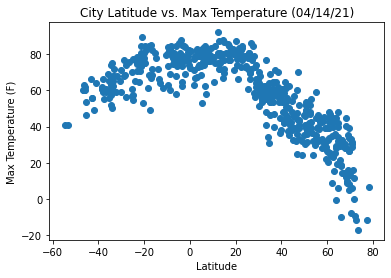

In [7]:
#Create Scatter plot for Temp vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

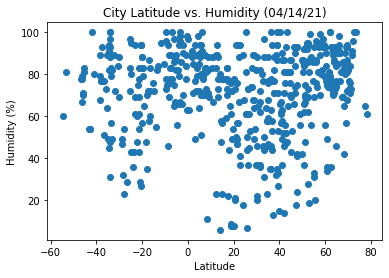

In [8]:
#Create Scatter plot for Humidity vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

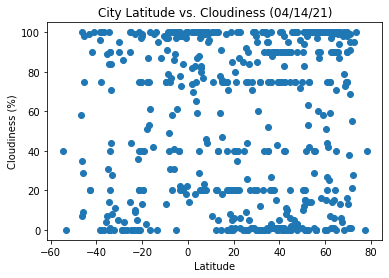

In [9]:
#Create Scatter plot for Cloudiness vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

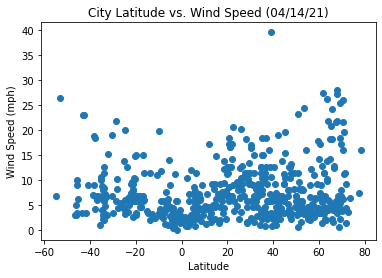

In [10]:
#Create Scatter plot for Wind vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [11]:
northernhem_df = weatherpy_df[weatherpy_df['Lat'] >= 0]
northernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thinadhoo,0.5333,72.9333,81.95,63,14,2.53,MV,1618448547
3,butaritari,3.0707,172.7902,81.79,77,83,7.23,KI,1618448473
4,sabzevar,36.2126,57.6819,63.91,35,100,4.36,IR,1618448655
5,taolanaro,38.5167,-28.7000,61.68,89,15,7.23,PT,1618448656
6,ribeira grande,53.3224,81.4980,36.25,99,100,3.24,RU,1618448659


In [12]:
southernhem_df = weatherpy_df[weatherpy_df['Lat'] < 0]
southernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,poum,-20.2333,164.0167,77.85,83,98,14.85,NC,1618448650
2,punta arenas,-53.1500,-70.9167,41.00,81,0,26.46,CL,1618448536
7,tyumentsevo,-17.7333,-149.1500,84.20,70,75,4.61,PF,1618448660
8,tautira,-23.1203,-134.9692,78.51,69,9,5.08,PF,1618448660
9,rikitea,-33.8679,151.2073,75.20,31,0,12.66,AU,1618448363


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.776060594046553


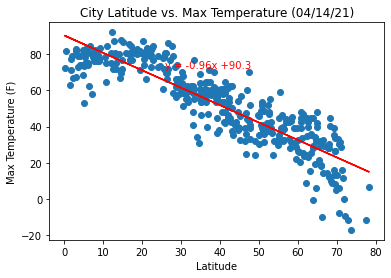

In [13]:
#Create Scatter plot for max temp vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4537919725185647


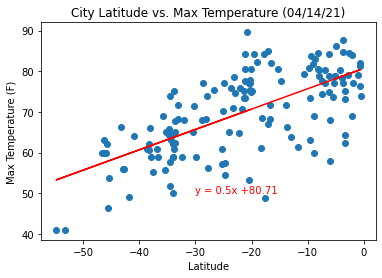

In [16]:
#Create Scatter plot for max temp vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02243015556988552


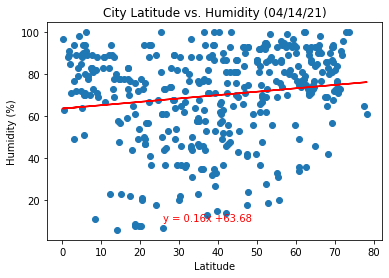

In [17]:
#Create Scatter plot for humidity vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03448562303031839


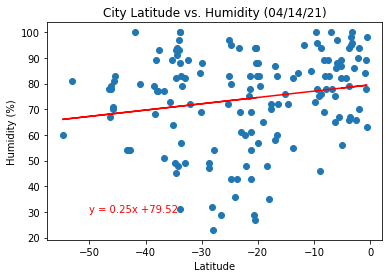

In [20]:
#Create Scatter plot for Wind vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004740747870078248


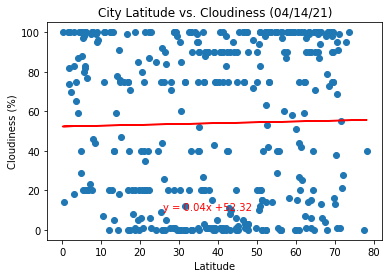

In [21]:
#Create Scatter plot for Wind vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06187744839207731


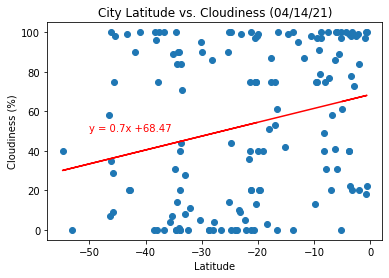

In [23]:
#Create Scatter plot for Wind vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03953304769041333


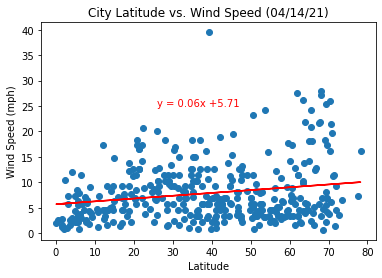

In [25]:
#Create Scatter plot for Wind vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,25),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10799752552506993


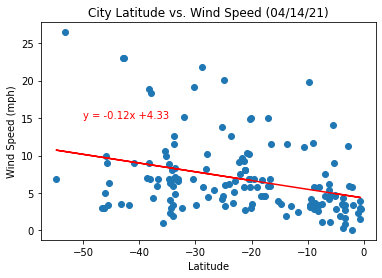

In [27]:
#Create Scatter plot for Wind vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()